### 06 - Importing Data in Python II
* **Importing data from the internet**
    * Importing flat files (*urlretrieve*)
    * Importing non-flat files (*pd.read_excel*)
    * HTTP requests to import files (*Request(url), urlopen(), requests.get(url), .text*)
    * BeautifulSoup (*BeautifulSoup(), .prettify(), .title, .get_text(), .find_all()*)
* **Interacting with APIs to import data from the web**
    * APIs and interacting with web (*.json()*)
* **Diving deep into the Twitter API**
    * The Twitter API and Authentication (*tweepy, MyStreamListener class, word_in_text(word, text)*)

## Importing data from the internet

### Importing flat files

In [42]:
# Read data from files in the web

import pandas as pd
from urllib.request import urlretrieve

url = 'https://raw.githubusercontent.com/MacropinnaM/DataCampHomeWork/master/Dogs.csv'
urlretrieve(url, 'dodgs.csv')
df = pd.read_csv('dogs.csv', ';')
df.head()

,Breed,Origin,Fédération Cynologique Internationale,American Kennel Club,Australian National Kennel Council,Canadian Kennel Club,The Kennel Club,New Zealand Kennel Club,United Kennel Club
0,Affenpinscher,Germany,Group 02 Section 01 #186,Toy Group,Group 01 (Toys),Group 05 - (Toys),Toy,Toy,Companion Dog
1,Afghan Hound,Afghanistan,Group 10 Section 01 #228,Hound Group,Group 04 (Hounds),Group 02 - (Hounds),Hound,Hound,Sighthound and Pariah
2,Afghan Shepherd,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aidi,Morocco,Group 02 Section 02 #247,NaN,NaN,NaN,NaN,NaN,Guardian Dog
4,Airedale Terrier,United Kingdom,Group 03 Section 01 #007,Terrier Group,Group 02 (Terriers),Group 04 - (Terriers),Terrier,Terrier,Terrier


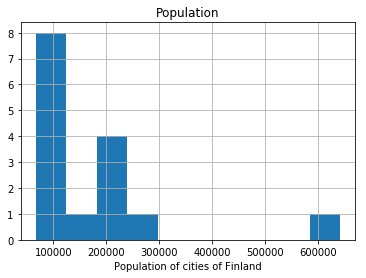

<bound method NDFrame.head of             City  Population  Land area  Density
0       Helsinki      642045     213.75  3003.72
1          Espoo      277375     312.26   888.28
2        Tampere      230537     525.03   439.09
3         Vantaa      221821     238.37   930.57
4           Oulu      201124    1410.17   142.62
5          Turku      188584     245.67   767.63
6      Jyväskylä      139260    1170.99   118.93
7          Lahti      119395     135.05   884.08
8         Kuopio      117842    1597.39    73.77
9        Kouvola       84548    2558.24    33.05
10          Pori       84779     834.06   101.65
11       Joensuu       75652    2381.76    31.76
12  Lappeenranta       72685    1433.36    50.71
13   Hämeenlinna       67601    1785.76    37.86
14         Vaasa       66876     188.81   354.20>


In [43]:
# Visualize data from files in the web

import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/MacropinnaM/DataCampHomeWork/master/finland.csv'
urlretrieve(url, 'finland.csv')
df = pd.read_csv('finland.csv')
pd.DataFrame.hist(df.iloc[:, 1:2])
plt.xlabel('Population of cities of Finland')
plt.show()

print(df.head)

### Importing non-flat files from the web

In [44]:
# Excel file

url = 'https://github.com/MacropinnaM/DataCampHomeWork/blob/master/finland.xlsx?raw=true'
xl = pd.read_excel(url, header=1)
print(xl.keys())
print(xl.City[:4])

Index(['City', 'Population', 'Landarea', 'Density'], dtype='object')
0    Helsinki
1       Espoo
2     Tampere
3      Vantaa
Name: City, dtype: object


### HTTP requests to import files

In [45]:
# http requests with urllib

from urllib.request import urlopen, Request

url = 'https://www.python.org/about/quotes/'
request = Request(url)
response = urlopen(request)
print(type(response))

html = response.read()
html

<class 'http.client.HTTPResponse'>


b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Ha

In [46]:
# http requests with requests

import requests

r = requests.get(url)
text = r.text
print(text)

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" conte

### BeautifulSoup

In [47]:
# Parsing html

from bs4 import BeautifulSoup

url = 'https://www.python.org/about/quotes/'
r = requests.get(url)
text = r.text

soup = BeautifulSoup(text, "lxml")
pretty_soup = soup.prettify()
print(pretty_soup)

<!DOCTYPE html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" dir="ltr" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js" rel="prefetch"/>
  <meta content="Python.org" name="application-name"/>
  <meta content="The official home of the Python Programming Language" name="msapplication-tooltip"/>
  <meta content="Python.org" name="apple-mobile-web-app-title"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="True" name="HandheldFriendly"/>
 

In [48]:
# Getting text from the page

url = 'https://legacy.python.org/doc/essays/blurb/'
r = requests.get(url)
soup = BeautifulSoup(r.text, "lxml")

title = soup.title
print(title)
print()

text = soup.get_text()
print(text)

<title>What is Python?  Executive Summary</title>




What is Python?  Executive Summary















































Advanced Search










About


News


Documentation


Current Docs


License


Help


FAQs


Beginner's Guide


Wiki


PEP Index


New-Style Classes


Regular Expressions


Audio/Visual Talks




Download


ä¸è½½


Community


Foundation


Core Development




Python Wiki
Python Insider Blog
Python 2 or 3?
Help Fund Python







Non-English Resources




                Python Release Schedule iCal Calendar
            





                Python Events iCal Calendar
            

Add an event to this calendar.




                Python User Group iCal Calendar
            

Times are shown in UTC/GMT.
Add an event to this calendar.






Documentation
>
            
            What is Python?  Executive Summary
          
What is Python?  Executive Summary
Python is an interpreted, object-oriented, high-level programming
language with dynamic 

In [49]:
# Getting the hyperlinks

url = 'https://www.python.org/doc/essays/'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')

a_tags = soup.find_all('a')
for link in a_tags:
    print(link.get('href'))

#content
#python-network
/
/psf-landing/
https://docs.python.org
https://pypi.python.org/
/jobs/
/community/
#top
/
#site-map
#
javascript:;
javascript:;
javascript:;
#
http://plus.google.com/+Python
http://www.facebook.com/pythonlang?fref=ts
http://twitter.com/ThePSF
/community/irc/
/accounts/login/
/accounts/signup/
/accounts/login/
/about/
/about/apps/
/about/quotes/
/about/gettingstarted/
/about/help/
http://brochure.getpython.info/
/downloads/
/downloads/
/downloads/source/
/downloads/windows/
/downloads/mac-osx/
/download/other/
https://docs.python.org/3/license.html
/download/alternatives
/doc/
/doc/
/doc/av
https://wiki.python.org/moin/BeginnersGuide
https://devguide.python.org/
https://docs.python.org/faq/
http://wiki.python.org/moin/Languages
http://python.org/dev/peps/
https://wiki.python.org/moin/PythonBooks
/doc/essays/
/community/
/community/diversity/
/community/lists/
/community/irc/
/community/forums/
/community/workshops/
/community/sigs/
https://wiki.python.org/moin/

## Interacting with APIs to import data from the web

### APIs and interacting with web

In [50]:
# API requests

r = requests.get('http://www.omdbapi.com/?apikey=ff21610b&t=avengers')
print(r.text)

{"Title":"The Avengers","Year":"2012","Rated":"PG-13","Released":"04 May 2012","Runtime":"143 min","Genre":"Action, Adventure, Sci-Fi","Director":"Joss Whedon","Writer":"Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)","Actors":"Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth","Plot":"Earth's mightiest heroes must come together and learn to fight as a team if they are going to stop the mischievous Loki and his alien army from enslaving humanity.","Language":"English, Russian, Hindi","Country":"USA","Awards":"Nominated for 1 Oscar. Another 38 wins & 79 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BNDYxNjQyMjAtNTdiOS00NGYwLWFmNTAtNThmYjU5ZGI2YTI1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"8.1/10"},{"Source":"Rotten Tomatoes","Value":"92%"},{"Source":"Metacritic","Value":"69/100"}],"Metascore":"69","imdbRating":"8.1","imdbVotes":"1,111,599","imdbID":"tt0848228","Type":"movie","DVD":"25 

In [51]:
# JSON from the web

import simplejson as json

json_data = r.json()
for key in json_data.keys():
    print(key + ': ' + str(json_data[key]))

Title: The Avengers
Year: 2012
Rated: PG-13
Released: 04 May 2012
Runtime: 143 min
Genre: Action, Adventure, Sci-Fi
Director: Joss Whedon
Writer: Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)
Actors: Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth
Plot: Earth's mightiest heroes must come together and learn to fight as a team if they are going to stop the mischievous Loki and his alien army from enslaving humanity.
Language: English, Russian, Hindi
Country: USA
Awards: Nominated for 1 Oscar. Another 38 wins & 79 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BNDYxNjQyMjAtNTdiOS00NGYwLWFmNTAtNThmYjU5ZGI2YTI1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '92%'}, {'Source': 'Metacritic', 'Value': '69/100'}]
Metascore: 69
imdbRating: 8.1
imdbVotes: 1,111,599
imdbID: tt0848228
Type: movie
DVD: 25 Sep 2012
BoxOffice: $623,279,547
Production: Walt 

In [52]:
# Wikipedia API

r = requests.get('https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=Marvel_Comics')
json_data = r.json()
extract = json_data['query']['pages']['20966']['extract']
print(extract)

<p class="mw-empty-elt">
</p>
<p><b>Marvel Comics</b> is the common name and primary imprint of <b>Marvel Worldwide Inc.</b>, formerly <b>Marvel Publishing, Inc.</b> and <b>Marvel Comics Group</b>, a publisher of American comic books and related media.  In 2009, The Walt Disney Company acquired Marvel Entertainment, Marvel Worldwide's parent company. 
</p><p>Marvel started in 1939 as Timely Publications, and by the early 1950s, had generally become known as Atlas Comics. The Marvel branding began in 1961, the year that the company launched <i>The Fantastic Four</i> and other superhero titles created by Stan Lee, Jack Kirby, Steve Ditko, and many others.
</p><p>Marvel counts among its characters such well-known superheroes as Captain America, Iron Man, Thor, Spider-Man, Wolverine, the Hulk, Daredevil, Ghost Rider, Dr. Strange, Punisher,  and such teams as the Avengers, the X-Men and the Fantastic Four, and antagonists including Doctor Doom, the Red Skull, the Green Goblin, Thanos, Ultro

## Diving deep into the Twitter API

### The Twitter API and Authentication

In [53]:
# API Authentication

import tweepy

access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [56]:
# Streaming tweets

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()
        
l = MyStreamListener()
stream = tweepy.Stream(auth, l)
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [58]:
# Load and explore Twitter data

import json

tweets_data = []
tweets_file = open('tweets.txt', "r")
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()

print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


In [59]:
# Twitter data to DataFrame

import pandas as pd

df = pd.DataFrame(tweets_data, columns=['lang', 'text'])
df.head()

,lang,text
0,en,RT @bpolitics: .@krollbondrating's Christopher...
1,en,RT @HeidiAlpine: @dmartosko Cruz video found.....
2,et,Njihuni me Zonjën Trump !!! | Ekskluzive https...
3,en,Your an idiot she shouldn't have tried to grab...
4,en,RT @AlanLohner: The anti-American D.C. elites ...


In [65]:
# Twitter text analysis

import re

def word_in_text(word, text):
    word.lower()
    text.lower()
    match = re.search(word, text)
    
    if match:
        return True
    return False

[cat, trump, people] = [0, 0, 0]
for index, row in df.iterrows():
    cat += word_in_text('cat', row['text'])
    trump += word_in_text('trump', row['text'])
    people += word_in_text('people', row['text'])

[cat, trump, people]

[5, 12, 5]